# pandas 실습(청와대 분석)


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/TTF/NanumGothic.ttf'  
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()

# plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
# plt.rc("font", family="NanumGothic")
plt.rc("font", family=font_name)
plt.rc("axes", unicode_minus=False)

In [3]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

* sns.set 은 기본설정이기 때문에 한번에 다해야만 함

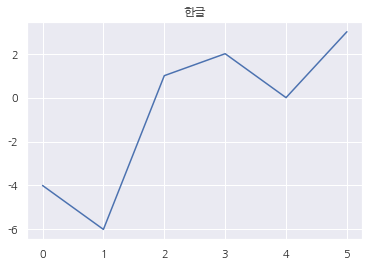

In [4]:
# 한글폰트 설정 확인을 합니다.
plt.title('한글')
plt.plot([-4,-6,1,2,0,3])



In [5]:
# 그래프가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## petitions_scraper 불려오기
- https://github.com/lovit/petitions_scraper

In [6]:
!rm -rf petitions_scraper_sample petitions_scraper scraping_petitions.py output index.txt
!git clone https://github.com/lovit/petitions_scraper.git petitions_scraper_sample
!mv petitions_scraper_sample/petitions_scraper .

Cloning into 'petitions_scraper_sample'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 340 (delta 31), reused 43 (delta 20), pack-reused 280
Receiving objects: 100% (340/340), 46.08 MiB | 8.93 MiB/s, done.
Resolving deltas: 100% (192/192), done.


In [7]:
!mv petitions_scraper_sample/scraping_petitions.py .

## petitions_scraper 테스트 

In [8]:
from petitions_scraper import parse_page

url = 'https://www1.president.go.kr/petitions/407329'
parse_page(url)

{'crawled_at': '2020-12-19 01:44:14',
 'category': '경제민주화',
 'begin': '2018-10-15',
 'end': '2018-11-14',
 'content': '금융위원회가 공모주 개인배정 축소(폐지)로 개인의 공모주 참여를 차단하려고 합니다 이와같은 금융위원회의 공모주 개인배정 축소(폐지)는 영세 개인 사업자의 골목상권을 빼앗아 가는 횡포와 같습니다. 이같은 행위는기업의 경제적 이익을 위해 개인의 밥그릇을 빼앗는 것으로 서민의 생계를 위협하는 처사입니다. 작금의 어려운 서민경제에서 가계에 조금이라도 보탬이 되고자 하는 개인 공모주 참여를 계속할 수 있도록 공모주 개인 배정 물량을 지금과 같이 할 수 있도록 꼭꼭 지켜주십시오.',
 'num_agree': 31,
 'petition_idx': '407329',
 'status': '청원종료',
 'title': '공모주 개인 배정 물량을 꼭꼭 지켜주십시오.'}

## 청와대 국민 청원 데이터 수집

In [9]:
%time !python scraping_petitions.py --first_index 594750 --last_index 594819

Successed to scrap petition = 594750 (0 / 70), 1 / 10 tries
Successed to scrap petition = 594751 (1 / 70), 1 / 10 tries
Successed to scrap petition = 594752 (2 / 70), 1 / 10 tries
Successed to scrap petition = 594753 (3 / 70), 1 / 10 tries
Successed to scrap petition = 594754 (4 / 70), 1 / 10 tries
Successed to scrap petition = 594755 (5 / 70), 1 / 10 tries
Successed to scrap petition = 594756 (6 / 70), 1 / 10 tries
Successed to scrap petition = 594757 (7 / 70), 1 / 10 tries
Successed to scrap petition = 594758 (8 / 70), 1 / 10 tries
Successed to scrap petition = 594759 (9 / 70), 1 / 10 tries
Successed to scrap petition = 594760 (10 / 70), 1 / 10 tries
Successed to scrap petition = 594761 (11 / 70), 1 / 10 tries
Successed to scrap petition = 594762 (12 / 70), 1 / 10 tries
Successed to scrap petition = 594763 (13 / 70), 1 / 10 tries
Successed to scrap petition = 594764 (14 / 70), 1 / 10 tries
Successed to scrap petition = 594765 (15 / 70), 1 / 10 tries
Successed to scrap petition = 5947

## 결과 파일을 dataframe 에 적재

In [10]:
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

In [11]:
onlyfiles = [f for f in listdir("output") if isfile(join("output", f))]
onlyfiles[:5]

['594753.json', '594752.json', '594803.json', '594812.json', '594768.json']

In [12]:
def read_json(filename):    
    path = f"output/{filename}"
    res = json.load(open(path, encoding="utf-8"))
    return res

In [13]:
json_list_data = list(map(read_json, onlyfiles))
json_list_data[:5]

[{'crawled_at': '2020-12-19 01:44:21',
  'category': '기타',
  'begin': '2020-12-17',
  'end': '2021-01-16',
  'content': '알고 계신가요? 100세 시대의 유족연금 승계방법 너무 억울하고 분합니다. 자녀들에게도 권리를 찾아주세요. 저는 공무원인 남편과 결혼하여 25년을 함께 살았으며, 20세이상 아들과 딸을 두고 있습니다. 남편은 2남 4녀 중 막내아들인데 너무 부모님을 사랑하는 효자였지요. 남편이 효자 다 보니 중증장애를 가지고 있지만 저 또한 며느리로써 남편과 함께 부모님께 최선을 다했습니다. 남편이 위암으로 2년 이상을 투병 생활을 하면서 힘든 나날을 보내다 석 달 전 먼저 세상을 떠났습니다. 너무 고통스러워했던 남편의 모습이 지금도 눈에 생생하고 가슴이 아픕니다. 남편을 떠나보낸 후 슬픔과 괴로움에 사망신고도 못 하고 아무것도 못 하고 있을 때 주위에서 자녀들을 생각해서 이제는 하나씩 정리를 해야 한다는 말에 무엇부터 해야 할지 아무것도 생각이 나지 않아 주변 분들의 도움으로 서류를 준비하고자 가족관계증명서를 발급받았습니다. 그런데 제가 하지도 않은 남편의 사망신고가 되어있었습니다. 사망 한지 딱 일주일이 되는 날 사망신고가 되어있더군요. 어떻게 배우자도 있고 자식도 있는데 한마디 말도 없이 사망신고를 할 수 있는지 너무 가슴이 아프지만 90세가 넘으신 시아버님께 따지지도 못하고 몇 날을 울기만 했습니다. 다시 마음을 추스르고 연금관리공단에 유족연금 상담을 하였습니다. 그때 처음 알았습니다. 유족연금 최우선 순위가 시부모님이라는 걸요. 배우자는 공동순위~ 시부모님께서 대표자를 배우자인 저로 선정해 주시면 제가 유족연금을 전부 받을 수 있다고 했습니다. 그래서 시아버님께 손자녀들을 위해 도와주십사 시댁에 몇 차례 방문하였지만 뵐 수 없었습니다. 그 후 아들과 딸이 할아버지를 찾아가 뵈었는데 왜 왔냐며, 호통을 치시고 국가에서 나에게 주는 돈을 왜 너희들이 간섭하냐

In [14]:
#pd.DataFrame?
jsondf = pd.DataFrame(data=json_list_data)
jsondf.shape

(70, 9)

In [15]:
jsondf.sort_values(by=["num_agree"],ascending=False).head(10)

,crawled_at,category,begin,end,content,num_agree,petition_idx,status,title
10,2020-12-19 01:44:35,반려동물,2020-12-17,2021-01-16,"11월 20일 금요일 새벽 5시 20분경, 피해자는 영업이 끝난 가게에서 난동을 부...",37580,594763,청원진행중,강아지 납치범을 엄벌에 처해주세요
61,2020-12-19 01:45:35,인권/성평등,2020-12-18,2021-01-17,저는 경기도 지역 국공립 어린이집 보육교사입니다. 계속되는 코로나19로 인해 국민들...,27057,594808,청원진행중,보육교사를 잠정적 코로나 확진자로 취급하는 시군구청과 보건복지부의 횡포를 멈춰주시고...
47,2020-12-19 01:45:30,보건복지,2020-12-18,2021-01-17,안녕하세요. 서울시 거주하는 보육교직원입니다. 일단 코로나 검사 무료 검사 받게 된...,20804,594804,청원진행중,서울시 보육교직원 코로나 검사 실시 관련 민원 제기합니다.
52,2020-12-19 01:44:18,정치개혁,2020-12-17,2021-01-16,"추미애 장관은 권력구조 개혁의 핵심 법무부 장관으로서 누구보다 공정하고, 민주주의 ...",18375,594751,청원진행중,대통령님 추미애 장관의 사의를 반려해 주세요.
29,2020-12-19 01:44:25,정치개혁,2020-12-17,2021-01-16,헌법정신을 유린하고 법치주의를 훼손한 문재인 대통령을 탄핵하여야 합니다. 12월16...,18014,594756,청원진행중,헌법정신을 유린하고 법치주의를 훼손한 문재인대통령을 탄핵하여야 합니다
2,2020-12-19 01:45:28,정치개혁,2020-12-18,2021-01-17,1. 온가족이 멸문지화의 형국으로 난도질을 당했습니다. 뒤를 이은 사람은 수 년전 ...,12444,594803,청원진행중,추미애 장관은 반드시 유임되어야 합니다.
62,2020-12-19 01:45:42,육아/교육,2020-12-18,2021-01-17,안녕하십니까? 안산시에서 아이들과 함께 생활하는보육교사입니다. 보육교직원은 코로나1...,10578,594813,청원진행중,안산시 보육시설 코로나 전수검사 실시 철회해주세요.
20,2020-12-19 01:45:26,정치개혁,2020-12-18,2021-01-17,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다. 대통령님께 드리는 호소...,9374,594801,청원진행중,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다
1,2020-12-19 01:44:20,정치개혁,2020-12-17,2021-01-16,❤문재인대통령님~ <긴급청원문> ●윤석열 해임에 걸림돌 사라졌습니다 대통령님 ~! ...,7375,594752,청원진행중,대통령님 윤석열 검찰총장을 해임시켜주십시요.
5,2020-12-19 01:45:23,정치개혁,2020-12-18,2021-01-17,용장을 기용하는 의로운 리더 문재인 대통령님께 경의를 표합니다. 추미애 장관님의 사...,7348,594799,청원진행중,추미애 장관 사퇴 철회 청원


In [22]:
df = jsondf[jsondf["begin"] == "2020-12-18"].copy()
df.shape

(40, 9)

- category 별로 countplot 

<AxesSubplot:xlabel='category', ylabel='count'>

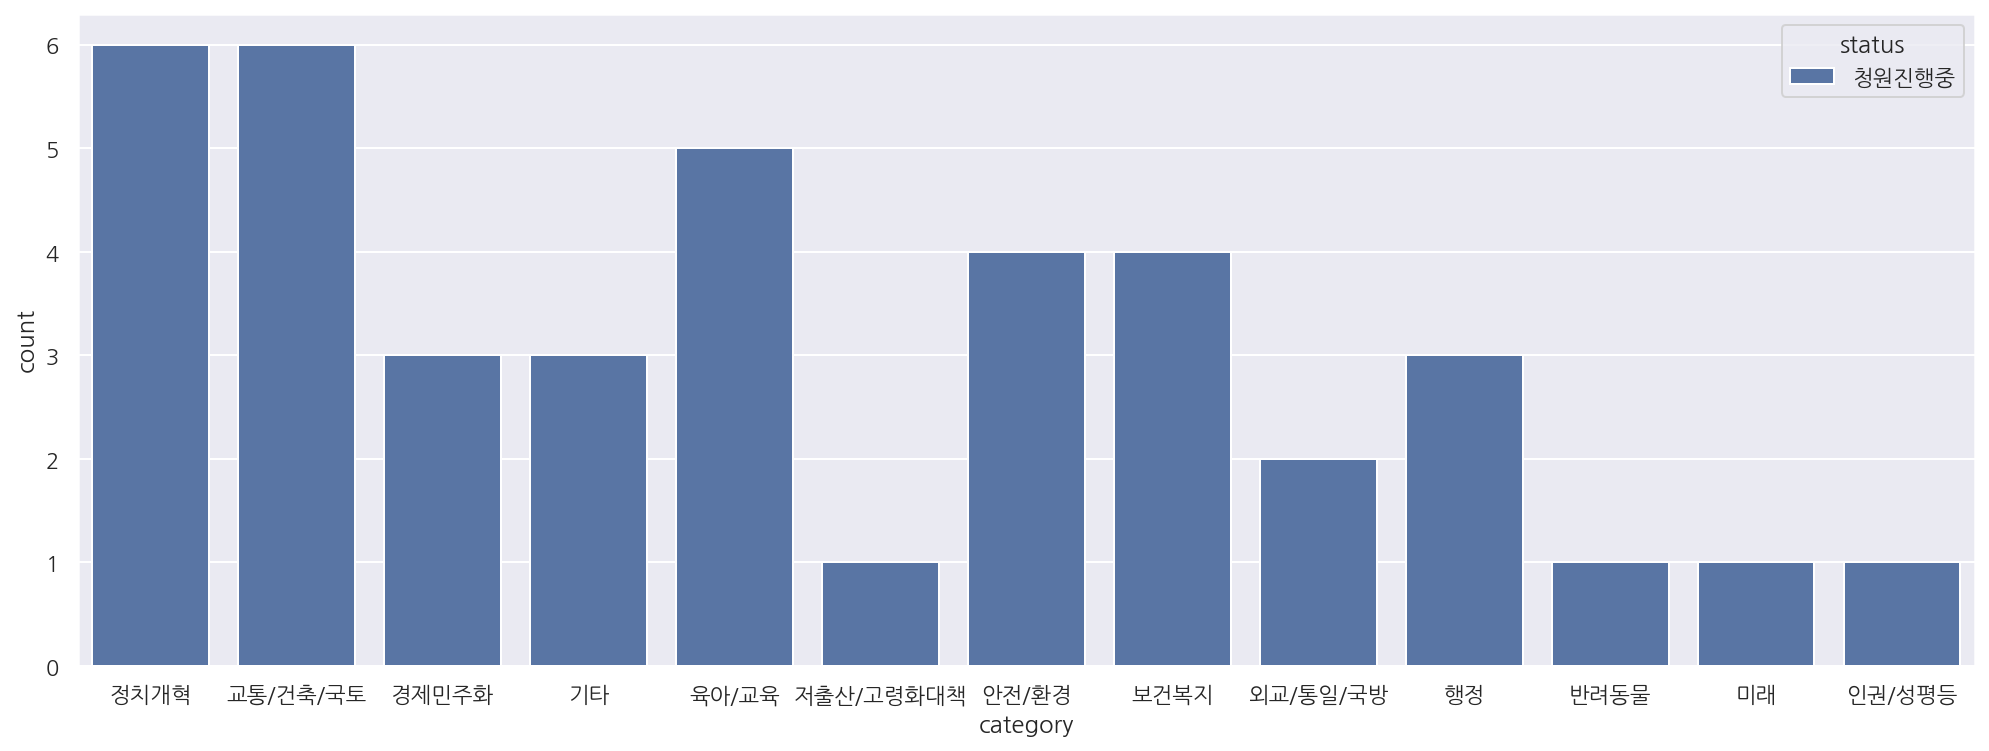

In [23]:
plt.figure(figsize=(17,6))
sns.countplot(data=df, x="category", hue="status")

## 단어 추출

### 형태소 분석
- 형태소 분석이란? 형태소 보다 단위가 큰 언어 단위인 어절, 혹은 문장을 최소 의미 단위인 형태소로 분절하는 과정이다.
![image.png](https://t1.daumcdn.net/cfile/blog/992B9433598141B91B)
- https://liveyourit.tistory.com/57

### KoNLPy 설치

In [24]:
 !pip install KoNLPy

### 형태소 분석

In [25]:
import jpype
import konlpy
from konlpy.tag import Okt

# Okt 객체 선언
okt = Okt()

In [26]:
def get_nouns(phrase):
    result = okt.nouns(phrase)
    result = list(filter(lambda x: len(x) > 1, result))
    return ",".join(result)

In [27]:
%time df['keyword'] = df["content"].map(get_nouns)

CPU times: user 7.08 s, sys: 14.8 ms, total: 7.09 s
Wall time: 5.19 s


In [28]:
df.head()

,crawled_at,category,begin,end,content,num_agree,petition_idx,status,title,keyword
2,2020-12-19 01:45:28,정치개혁,2020-12-18,2021-01-17,1. 온가족이 멸문지화의 형국으로 난도질을 당했습니다. 뒤를 이은 사람은 수 년전 ...,12444,594803,청원진행중,추미애 장관은 반드시 유임되어야 합니다.,"가족,멸문,화의,형국,난도질,사람,년전,아들,정상,군대,휴가,문제,몇개,맷돌,사람,..."
3,2020-12-19 01:45:40,교통/건축/국토,2020-12-18,2021-01-17,39세의 대구에사는 신혼부부입니다. 저희 부부는 올해 9월에 주택청약에 당첨이 되어...,244,594812,청원진행중,조정대상지역 확대에 무주택자의 대출규제를 멈춰주세요,"대구,신혼부부,저희,부부,올해,주택,청약,당첨,처음,내집마련,계약금,납부,중도,대출..."
5,2020-12-19 01:45:23,정치개혁,2020-12-18,2021-01-17,용장을 기용하는 의로운 리더 문재인 대통령님께 경의를 표합니다. 추미애 장관님의 사...,7348,594799,청원진행중,추미애 장관 사퇴 철회 청원,"기용,리더,문재인,대통령,경의,추미애,장관,사퇴,철회,청원,시민,여러분,검찰,개혁,..."
7,2020-12-19 01:45:15,경제민주화,2020-12-18,2021-01-17,우리 현대엠엔소프트 소액주주들은 미래차 자율주행 패러다임 대전환의 시대를 맞아 현대...,295,594793,청원진행중,"현대엠엔소프트와 현대오토에버, 불공정한 합병비율 개선이 필요합니다","우리,소프트,소액,주주,미래,자율,주행,패러다임,전환,시대,현대차,그룹,미래,긍정,..."
8,2020-12-19 01:45:24,기타,2020-12-18,2021-01-17,아주 오래전부터 한전 전기요금에 포함되어있는 방송수신료... 이것만 따로 안낼수있다...,1612,594800,청원진행중,KBS의 수신료 폐지를 청원 합니다.,"아주,부터,한전,전기요금,포함,방송,수신료,심정,보지,프로그램,방송,느낌,수신료,방..."


In [29]:
fac = ",".join(df.sort_values(by=["num_agree"],ascending=False).head(10).loc[df["keyword"].notnull(), "keyword"])
fac[:100]

'경기도,지역,공립,어린이집,보육,교사,계속,코로나,국민,모두,나날,가운데,포함,보육,교사,또한,호소,청원,구청,보건복지부,횡포,부분,유감,긴급,보육,시작,보육,교사,코로나,대응,지'

In [30]:
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

보육    44
교사    27
장관    23
검찰    23
검사    16
dtype: int64

<AxesSubplot:>

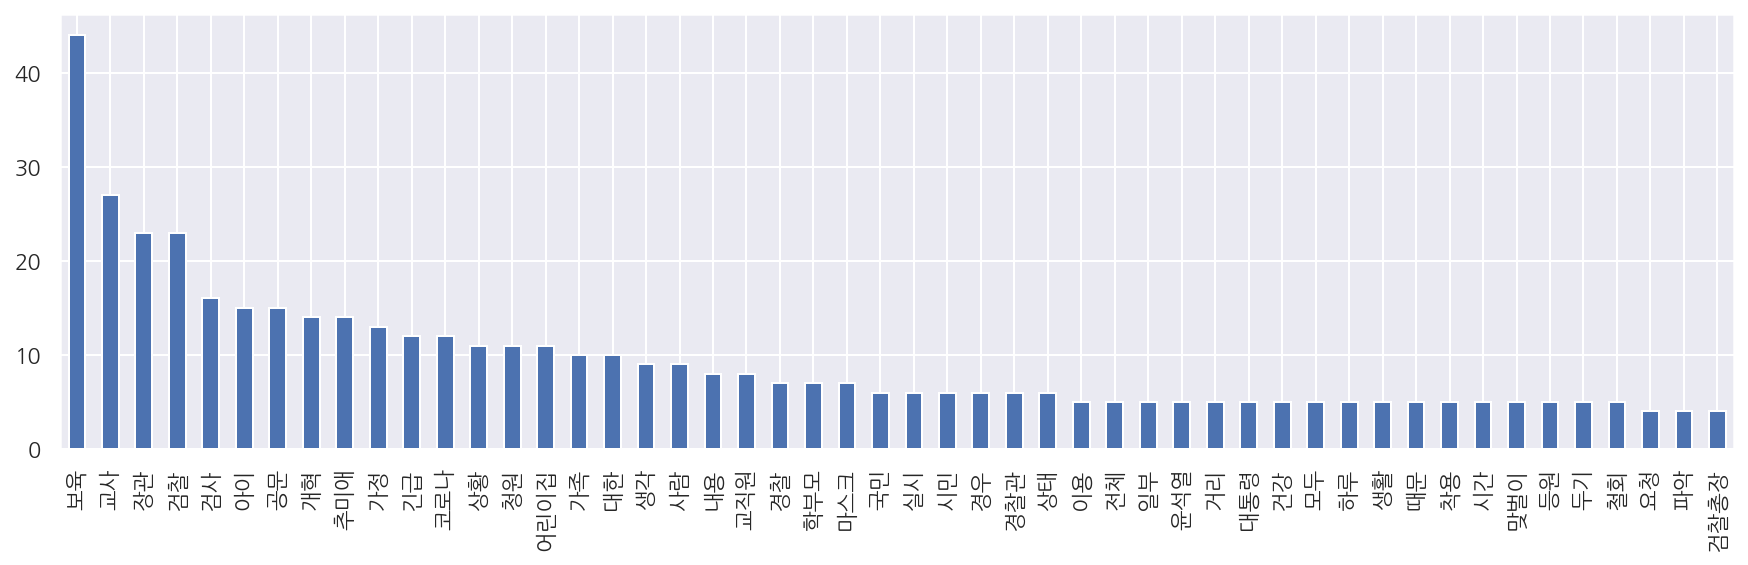

In [31]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_count.head(50).plot.bar(figsize=(15, 4))

In [32]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'


from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["것", "수", "제","저","대해","등","이"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

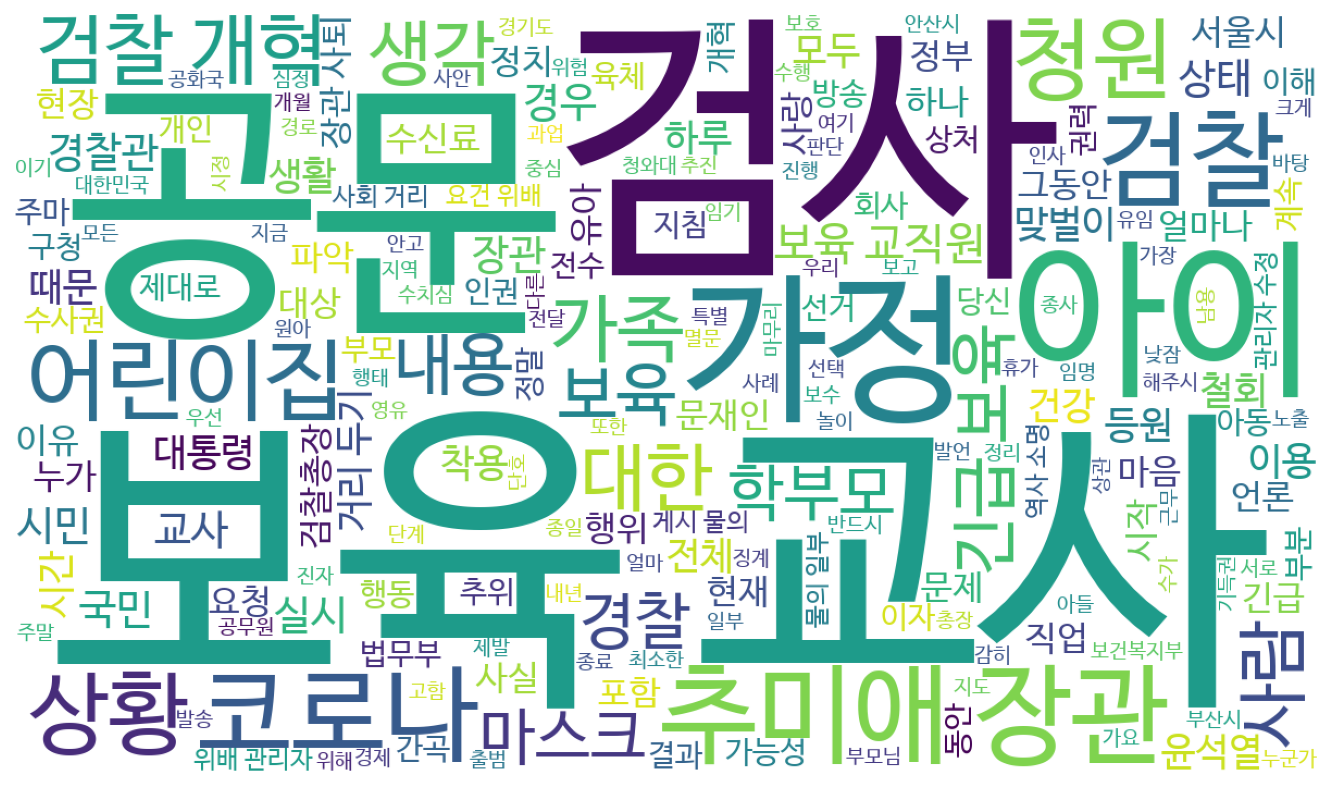

In [33]:
# 위에서 만든 함수에 전처리한 text인 fac을 넣어 그려봅니다.


wordcloud(fac, width=1200, height=700)